# LendingClub Loan Data Analysis and Classification Model

## The Data

The dataset I will be using for this project was obtained from Kaggle and can be found here: https://www.kaggle.com/wordsforthewise/lending-club

## The Goal

LendingClub is a company that operates the world's largest peer-to-peer lending platform, which offers loan trading on a secondary market.

Using the historical data on loans given out, my goal is to build a model that can predict whether a borrower will pay back on their loan or default. I will be using a variety of libraries to perform some beginning exploratory data anaylis and feature engineering, and then using Keras to build, train, and optimize my model!

### 0. Data Overview

**Goal:** Import the necessary libraries and the data that will be used for this project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the feature data and descriptions to have as reference
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
#Function to quickly grab feature info
def feat_info(col_name):
    print(data_info.loc[col_name,'Description'])

In [5]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [6]:
#importing the data
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### 1. Exploratory Data Analysis

**Goal:** Get a better understanding of the variable in the data set through summarizing, statistics, and visualizations.

The classification label for this data, which is what we will be trying to predict, will be the 'loan_status' colum. Lets visulaize this column.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

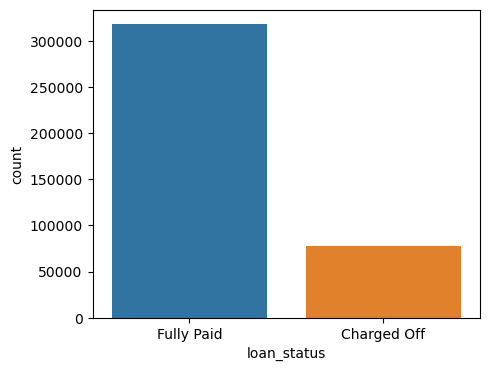

In [10]:
plt.rcParams['figure.figsize'] = (5,4)
sns.countplot(data=df,x='loan_status')

I am also curious about the distribution of loan amounts.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

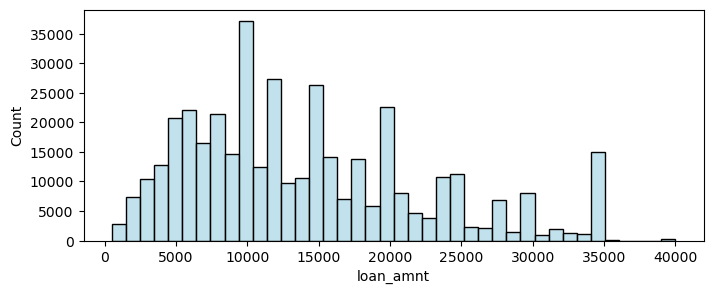

In [11]:
plt.figure(figsize=(8,3))
sns.histplot(df['loan_amnt'],bins=40,color='lightblue')

I'd like to explore the correlation between the feature variables.

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


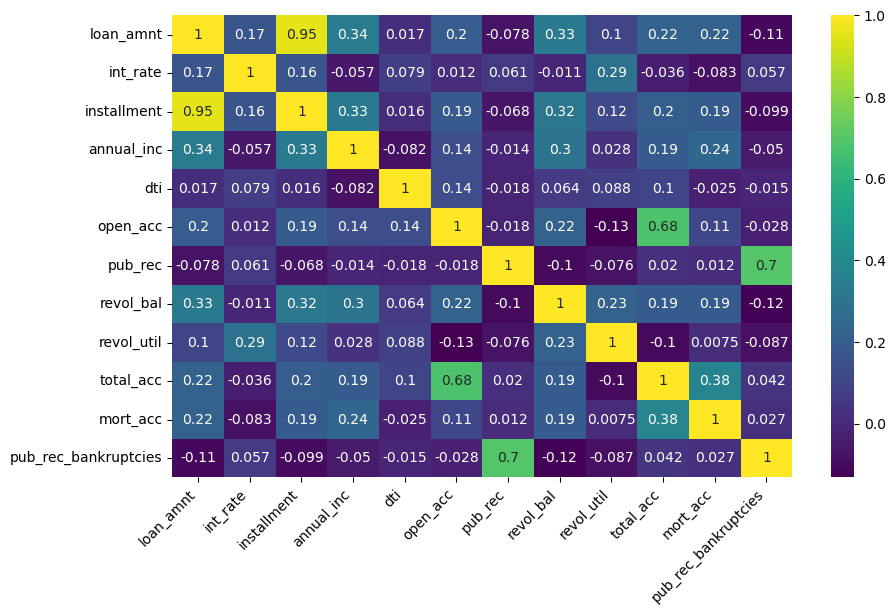

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

There is a near perfect correlation between the 'loan_amnt' and 'installment' features. Let's explore this relationship a bit more to see if there is duplicate information.

In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

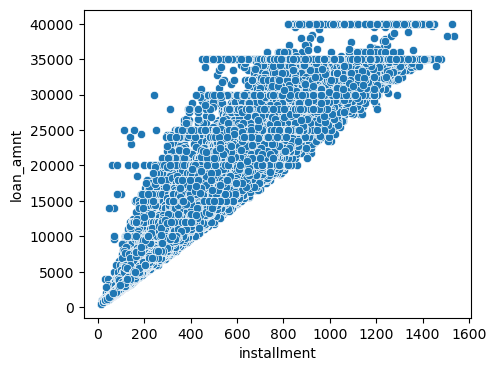

In [16]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

It makes sense why these two features are so highly correlated: The installment amount feature almost certainly uses the loan amount to be calculated. Due to this I may want to drop one of these feature for this reason later on, but I will keep it in the back of my mind for now.

Lets keep exploring other columns to get a better idea of the data.

I would like to see if there is a significant correlation between the loan amount and whether the borrower defaults. It does not look like the correlation is strong.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

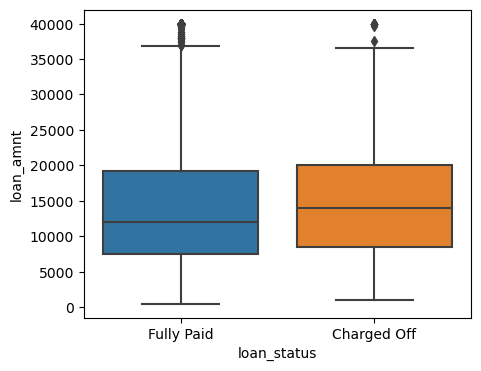

In [17]:
sns.boxplot(data=df ,x='loan_status', y='loan_amnt')

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Next, I'd like to explore the Grade and SubGrade columns that LendingClub attributes to the loans. I will be looking to see what these gradings are and how they are distributed amongst paid vs. defaulted loans.

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

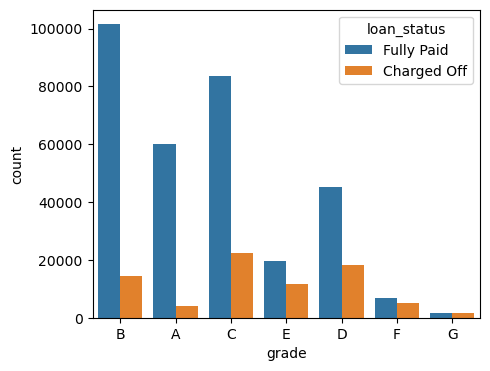

In [21]:
sns.countplot(data=df, x='grade', hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

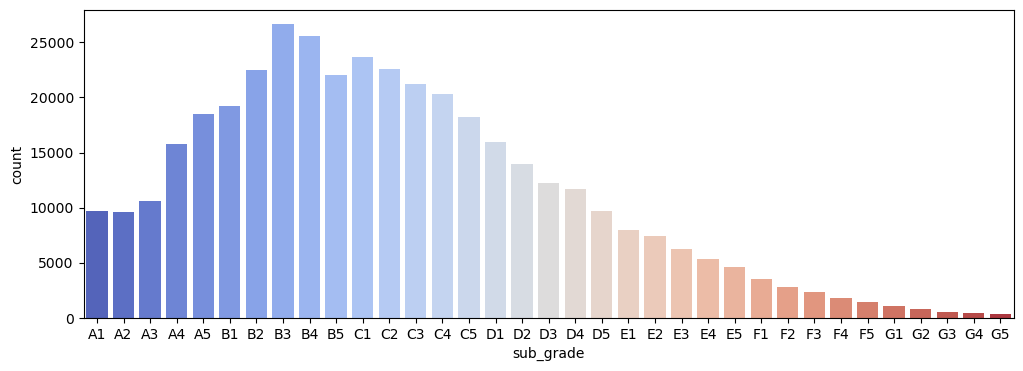

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', order=subgrade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

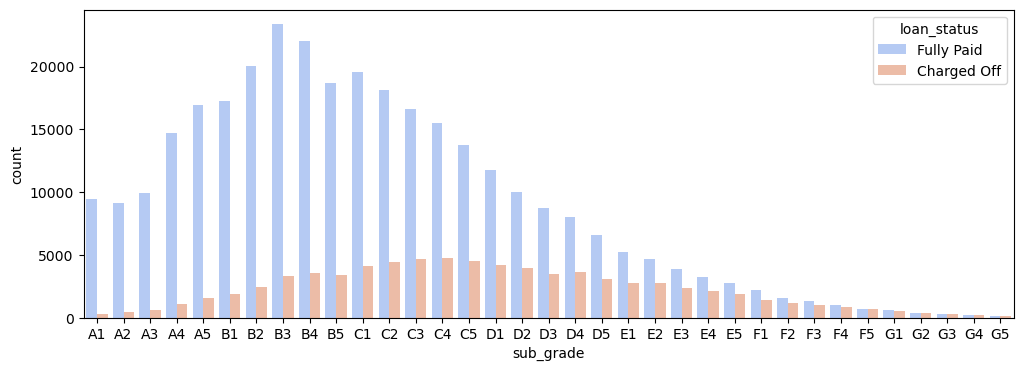

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='sub_grade', order=subgrade_order, hue='loan_status',palette='coolwarm')

A large portion of the F and G subgrades don't get paid back often, but I'd like to isolate them in a seperate countplot for a better look.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

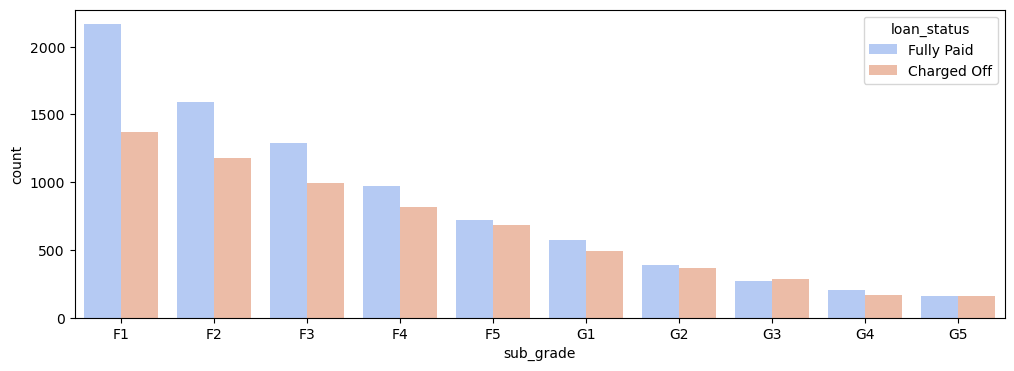

In [24]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order, hue='loan_status', palette='coolwarm')

That is enough data visualization for now. Before continuing to the data preprocessing, I have to create a new column which will represent the loan status column using 0 and 1 values.

In [25]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Now that I have this new column created, I'd like to quickly see the correlation between loan_repaid and other numeric features in the dataset.

<AxesSubplot:>

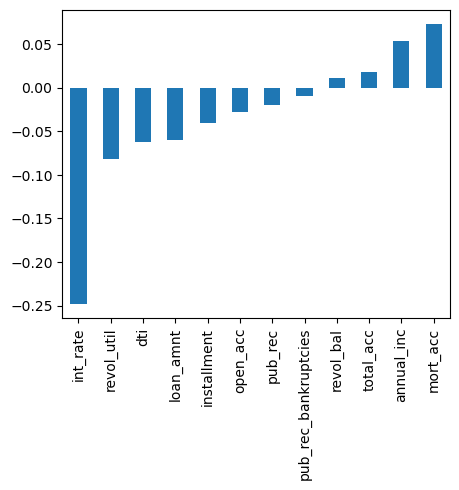

In [28]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

### 2. Data Preprocessing

**Goal:** Remove or fill in missing data points. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

I will start off by taking a look at the number, and percentage, of missing data points per each column.

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

I'll start by looking at the 'emp_title' and 'emp_legth' columns.

In [31]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [32]:
df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically, there are too many unique job titles to concert this column into a dummy variable feature. I will remove this column from the dataset and take a look at 'emp_length' to see if it has a strong relationship to 'loan_status'.

In [34]:
df = df.drop('emp_title', axis=1)

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

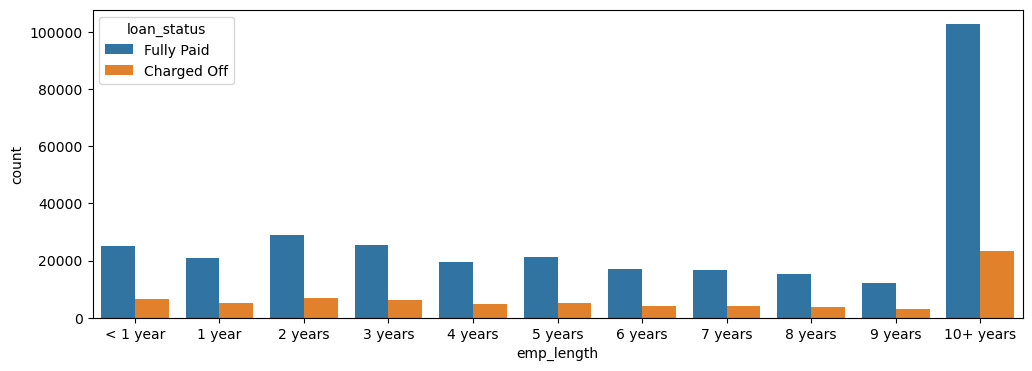

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='emp_length', order=emp_length_order, hue='loan_status')

It is still difficult to see whether there is a strong relationship between employment length and loan status. Here it will be more useful to calculate the ratio between Fully Paid and Charged Off for each employment length group.

In [38]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [39]:
emp_ratio = emp_co/emp_fp
emp_ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

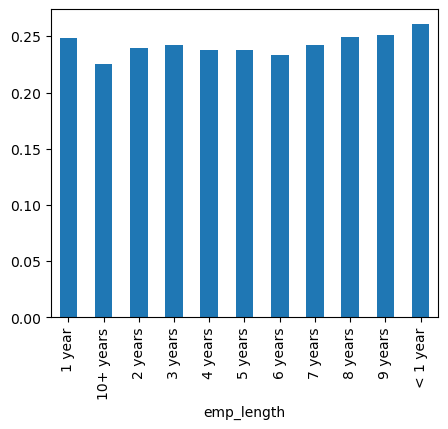

In [40]:
emp_ratio.plot(kind='bar')

The default, or charged off, rate per employment length group is reletively similar amongst groups, so I will be removing it and check the remaining columns which still have missing data.

In [41]:
df = df.drop('emp_length', axis=1)

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [44]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

It looks like the 'title' column is just a repeat of the 'purpose' column, so I will be dropping this column and move on to look at the 'mort_acc' column.

Since the 'revol_util' and 'pub_rec_bankruptcies' colunms are missing such a miniscule amount of datapoints, 0.07% and 0.13% respectively, I will be removing these rows from the datasets after I deal with the 'mort_acc' column.

In [45]:
df = df.drop('title', axis=1)

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


In [47]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [48]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

It looks like the 'total_acc' column is most highly correlated with 'mort_acc'. This makes sense as intuitively the more accounts you have, the higher chance you will have more mortgage account. 

To fill in the missing data points for 'mort_acc', I can group the dataframe by 'total_acc' and calculate the mean value for the mort_acc per total_acc group.

In [49]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

I can now drop the remaining rows with missing values as they represent such a small small percentage of the total data. At this point the dataset will no longer have any missing values.

In [53]:
df = df.dropna()
df = df.drop('loan_status', axis=1)

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### 2.1 Categorical Values to Dummy Variables

Now that I am done dealing with the missing data, it is time to deal with the string values within the categorical columns.

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### term feature
This colunm is relatively easy to deal with by converting it to a int.

In [56]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [57]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

#### grade & sub_grade features
I already know that grade gives the same information at sub_grade, but with less detail. I can simply drop this column.

Then I can convert the sub_grade feature into dummy variables and drop the original column.

In [58]:
df = df.drop('grade', axis=1)

In [59]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

#### verification_status, application_type, initial_list_status & purpose features
These features do not have too many unique values and can be therefore transformed into dummy variables.

In [61]:
df[['verification_status','application_type','initial_list_status','purpose']]

,verification_status,application_type,initial_list_status,purpose
0,Not Verified,INDIVIDUAL,w,vacation
1,Not Verified,INDIVIDUAL,f,debt_consolidation
2,Source Verified,INDIVIDUAL,f,credit_card
3,Not Verified,INDIVIDUAL,f,credit_card
4,Verified,INDIVIDUAL,f,credit_card
...,...,...,...,...
396025,Source Verified,INDIVIDUAL,w,debt_consolidation
396026,Source Verified,INDIVIDUAL,f,debt_consolidation
396027,Verified,INDIVIDUAL,f,debt_consolidation
396028,Verified,INDIVIDUAL,f,debt_consolidation


In [62]:
df[['verification_status','application_type','initial_list_status','purpose']].nunique()

verification_status     3
application_type        3
initial_list_status     2
purpose                14
dtype: int64

In [63]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'], axis=1)
df = pd.concat([df,dummies], axis=1)

#### home_ownership feature
To simplify this feature a bit further, I will combine 'NONE' and 'ANY' into the 'OTHER' category.

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [65]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1), dummies], axis=1)

#### address feature
The address column contains too much unique information to neatly deal with. I can instead feature engineer a new 'zip_code' column by extracting only the zip code from each address 

In [66]:
print(df['address'].unique())
print('\n')
print(df['address'].nunique())

['0174 Michelle Gateway\nMendozaberg, OK 22690'
 '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113'
 '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113' ...
 '953 Matthew Points Suite 414\nReedfort, NY 70466'
 '7843 Blake Freeway Apt. 229\nNew Michael, FL 29597'
 '787 Michelle Causeway\nBriannaton, AR 48052']


392898


In [67]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [68]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop(['zip_code','address'],axis=1), dummies], axis=1)

#### issue_d feature
Including this feature would be data leakage. I wouldn't know beforehand whether or not a loan would be issued using my model, so in theory I wouldn't have an issue_date. I will therefore drop this feature.

In [69]:
df = df.drop('issue_d', axis=1)

#### earliest_cr_line feature
This is simply a historical time stamp feature. I can extract the year and then convert it to a numerical feature in order to avoid creating more dummy variables.

In [70]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [71]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [72]:
df['earliest_cr_line'].nunique()

684

In [73]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

### 3. The Model
#### Sampling the Data
In the interest of saving time on training, as I have a low RAM computer, I will be using a sample of the dataset for training.

In [74]:
df_smp = df.sample(frac=0.2,random_state=42)

#### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df_smp.drop('loan_repaid', axis=1).values
y = df_smp['loan_repaid'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
print(X_train.shape, X_test.shape)

(63235, 78) (15809, 78)


#### Normalizing the data
I used the MinMaxScaler to normalize the feature data of X_train and X_test. Since I don't want data leakge from the test set, I will only fit on the X_train data.

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating the Model
###### Choosing the number of layers and amount of neurons for each layer:
Every Neural Network has a input layer and in majority of cases the number of neurons comprimising that layer is equal to the number of features in the data. In this case, it is 78. 

From research I have done, hidden layers follow two rules in majority of problems: (1) the humber of hidden layers equals one; and (2) the number of neurons in that layer is the mean of the neurons in the input and output layers. I have tested adding additional hidden layers with neurons equal to the mean of neurons from the previous and next layers, to only get marginally better classification report scores. Following the theory of Occam's Razor (that goes something like - "The simplest solution if likely the correct one"), I have kept the model with a single hidden layer. 

For the output layer, since the NN is a classifier and does *not* use a softmax function, it will only contain one neuron.

###### Choosing to use dropout layers:
I chose to add dropout layers to help with overfitting the data, as it prevents all neurons in a lyaer from synchronously optimizing their weights. I experimented with the dropout range being between 10% and 50%, and found that that a rate of 40% produced the best results.

###### Using an Early Stop:
To prevent trial-and-error expirementation while choosing the right amount of epochs to train on, I added an early stopping callback so I could set epoch training length to an erbitrarily large number.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-07-06 19:23:24.236918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
model = Sequential()

2023-07-06 19:23:31.865309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [84]:
model.add(Dense(78, activation='relu', name='input'))
model.add(Dropout(0.4))

model.add(Dense(39, activation='relu', name='hidden'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [85]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [86]:
model.fit(x=X_train,
         y=y_train,
         batch_size=128,
         epochs=500,
         validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/500
495/495 [==============================] - 3s 3ms/step - loss: 0.3670 - val_loss: 0.2732
Epoch 2/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2844 - val_loss: 0.2637
Epoch 3/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2743 - val_loss: 0.2606
Epoch 4/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2699 - val_loss: 0.2599
Epoch 5/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2668 - val_loss: 0.2594
Epoch 6/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2653 - val_loss: 0.2585
Epoch 7/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2641 - val_loss: 0.2587
Epoch 8/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2634 - val_loss: 0.2582
Epoch 9/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2617 - val_loss: 0.2574
Epoch 10/500
495/495 [==============================] - 1s 3ms/step - loss: 0.2608 - val_lo

<AxesSubplot:>

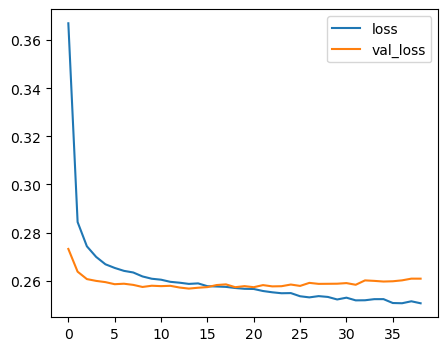

In [87]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

The performance of this model is not bad, but also not great. Since the model label is skewed, with 80% of loans being fully repaid, I am not fully satisfied with a percision of 90% as just guessing 'fully paid' for each classification would yeild a score of 80%. The recall score for charged off loans could also be much better. The cause for such a low score is most likley due to the imbalanced dataset.

In [89]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

495/495 [==============================] - 1s 1ms/step
[[ 1412  1672]
 [   76 12649]]
              precision    recall  f1-score   support

           0       0.95      0.46      0.62      3084
           1       0.88      0.99      0.94     12725

    accuracy                           0.89     15809
   macro avg       0.92      0.73      0.78     15809
weighted avg       0.90      0.89      0.87     15809



#### Trying RandomForestClassifier
To see whether my NN model is at fault, I decided to try classifing the data using a Random Forest algorithm, but it did'nt produce and results that were significantly better than my NN.

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [92]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1410  1674]
 [   51 12674]]
              precision    recall  f1-score   support

           0       0.97      0.46      0.62      3084
           1       0.88      1.00      0.94     12725

    accuracy                           0.89     15809
   macro avg       0.92      0.73      0.78     15809
weighted avg       0.90      0.89      0.87     15809



#### Implementing SMOTE
Since I suspect the model's recall score is suffering due to it's imbalanced data, I decided to try implementing the synthetic minority over sampling technique, or SMOTE for short. Using this technique I am able to up the samples of the minority class while avoiding overfitting. Simplified, this technique does this by generating new synthetic samples close to other points.

After adding these synthetic samples to the dataset, I will run the Random Forest Classifier and my NN model again to see if this will improve the recall score, therefore improving the overall model.

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
sm = SMOTE(random_state=42, k_neighbors=5)

X_res, y_res = sm.fit_resample(scaler.fit_transform(X), y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#### Success!
It looks like the recall score for the minority (charged off loans) class was greatly improved!

In [96]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11451  1280]
 [  565 12154]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     12731
           1       0.90      0.96      0.93     12719

    accuracy                           0.93     25450
   macro avg       0.93      0.93      0.93     25450
weighted avg       0.93      0.93      0.93     25450



In [97]:
model.fit(x=X_train,
         y=y_train,
         batch_size=128,
         epochs=500,
         validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3499 - val_loss: 0.3317
Epoch 2/500
796/796 [==============================] - 3s 3ms/step - loss: 0.3422 - val_loss: 0.3306
Epoch 3/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3383 - val_loss: 0.3277
Epoch 4/500
796/796 [==============================] - 3s 3ms/step - loss: 0.3364 - val_loss: 0.3262
Epoch 5/500
796/796 [==============================] - 3s 3ms/step - loss: 0.3343 - val_loss: 0.3256
Epoch 6/500
796/796 [==============================] - 3s 3ms/step - loss: 0.3331 - val_loss: 0.3237
Epoch 7/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3316 - val_loss: 0.3254
Epoch 8/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3294 - val_loss: 0.3234
Epoch 9/500
796/796 [==============================] - 3s 3ms/step - loss: 0.3282 - val_loss: 0.3199
Epoch 10/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3277 - val_lo

796/796 [==============================] - 2s 3ms/step - loss: 0.3067 - val_loss: 0.3044
Epoch 82/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3059 - val_loss: 0.3053
Epoch 83/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3072 - val_loss: 0.3061
Epoch 84/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3056 - val_loss: 0.3058
Epoch 85/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3061 - val_loss: 0.3057
Epoch 86/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3050 - val_loss: 0.3050
Epoch 87/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3050 - val_loss: 0.3044
Epoch 88/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3054 - val_loss: 0.3045
Epoch 89/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3030 - val_loss: 0.3059
Epoch 90/500
796/796 [==============================] - 2s 3ms/step - loss: 0.3060 - val_loss: 

<AxesSubplot:>

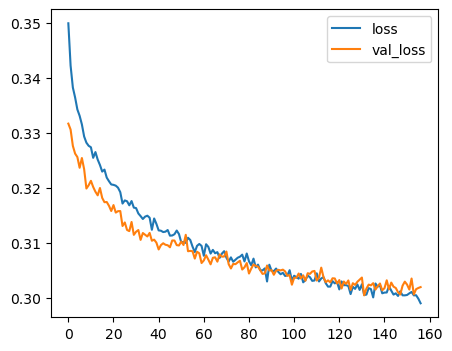

In [98]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Using SMOTE with my NN has lowered percision for both classes and recall for the majority class as a tradeoff for increasing recall for the minority class. This was unexpected and the overall f1-score is now lower as a result of this, interesting!

In [99]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

796/796 [==============================] - 1s 2ms/step
[[10967  1764]
 [ 2005 10714]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12731
           1       0.86      0.84      0.85     12719

    accuracy                           0.85     25450
   macro avg       0.85      0.85      0.85     25450
weighted avg       0.85      0.85      0.85     25450



## Conclusion
Although my NN model underperformed compared to the results from the Random Forrest Classifier, I am satisfied with my final results for this project. I am sure I could find ways to continue improving performance had I chosen to continue with this project. 

#### If I were to re-do this project...
I would check whether the data is linearly separable using a Support Vector Machine. This is a desireable, yet rare, attribute for datasets to have.

I have read that a NN model does not need to have a hidden layer if data is linearly seperable, or a NN is not even needed at all to resolve the data. Solving for linear seperability would help make these decisions and maybe help choose to use a Random Forrest Classifier from the get-go.

I also learned that implementing a single-layer perceptron + sigmoid function using binary cross-entropy, is pretty much a logistic regression model, which is a linear model. It would therefore make sense why this classifier model would not need a hidden layer. If the data was not linearly seperable, a linear model like such would not perform well, and therefore need a hidden layer. 

## Thank you for taking the time to read through my project!